# Assignment 6

## Part 1: Implementation and Analysis of Selection Algorithms

### Median of Medians

In [7]:
from typing import List

def find_median(split_list: List[int], group_size: int):
    # Sort
    sorted_list = split_list.sort()

    # Find Median
    median = split_list[group_size // 2]

    return median


def median_of_medians(arr: List[int], k: int, group_size: int = 5):
    split_lists = [arr[i : i + k] for i in range(0, len(arr), k)]
    medians = [find_median(split, k) for split in split_lists]
    
    # Sort the medians
    if len(medians) <= group_size:
        # Base case:
        medians.sort()
        pivot = medians[len(medians) // 2]
    else:
        pivot = median_of_medians(medians, group_size)
    

    # Now use the pivot on the original array
    low = [x for x in arr < pivot]
    high = [x for x in arr > pivot]
    equal = [x for x in arr == pivot]

    if(len(low)) > k:
        # Median is in the lower part
        return median_of_medians(low, k)
    elif len(low) + len(pivot) > k:
        return pivot
    else:
        return median_of_medians(high, k - len(equal) - len(low))

### Randomized QuickSelect

In [8]:
import random


def randomized_partition(arr: List[int], left: int, right: int):
    pivot_index = random.randint(left, right)
    arr[pivot_index], arr[right] = arr[right], arr[pivot_index]

    pivot = arr[right]

    i = left - 1  # index of the last swpped element
    for j in range(left, right):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[right] = arr[right], arr[i + 1]

    return i + 1


def randomized_quickselect(arr: List[int], left: int, right: int, k: int):
    if left == right:
        return arr[left]

    pivot_index = randomized_partition(arr, left, right)

    if pivot_index == k:
        return arr[pivot_index]
    elif pivot_index > k:
        return randomized_quickselect(arr, left, pivot_index - 1, k)
    else:
        return randomized_quickselect(arr, pivot_index + 1, right, k)

## Part 2 Performance Analysis of Selection Algorithms

## 1. **Implementation**

### 1.1 **Deterministic Algorithm**: Median of Medians
- Implemented the **Median of Medians** algorithm, which guarantees **O(n)** worst-case time complexity for selecting the k-th smallest element in an unsorted array.
- The algorithm divides the array into groups of 5, finds the median of each group, recursively computes the median of the medians, and then partitions the array around this median until it finds the desired k-th element.
- Efficiently handles edge cases such as arrays with duplicate elements and ensures correctness across diverse datasets.

### 1.2 **Randomized Algorithm**: Randomized Quickselect
- Implemented **Randomized Quickselect**, which achieves **O(n)** expected time complexity by randomly choosing a pivot to partition the array.
- The algorithm recursively partitions the array around a randomly chosen pivot until it finds the k-th smallest element.
- The use of random pivots helps avoid the worst-case performance of Quickselect, which could degrade to **O(n²)** if the pivot is always poorly chosen.
- Handles edge cases effectively, including arrays with duplicate elements.

## 2. **Performance Analysis**

### 2.1 **Time Complexity**

#### 2.1.1 **Deterministic Algorithm (Median of Medians)**
- **Worst-case time complexity**: **O(n)**
  - The Median of Medians algorithm guarantees linear time complexity by ensuring that the pivot used for partitioning divides the array into reasonably balanced subarrays.
  - After dividing the array into groups of 5, the algorithm finds the median of each group and then recursively computes the median of these medians. This ensures that the pivot is always "good enough" to partition the array efficiently, resulting in a worst-case linear time complexity.
  - Detailed breakdown:
    - Splitting the array into groups of 5: **O(n)**
    - Finding the medians of each group: **O(n)**
    - Recursively finding the median of medians: **O(n)**
    - Partitioning around the pivot: **O(n)**
  - Hence, the overall time complexity is **O(n)**.

#### 2.1.2 **Randomized Algorithm (Randomized Quickselect)**
- **Expected time complexity**: **O(n)**
  - The Randomized Quickselect algorithm achieves expected linear time complexity by using random pivots for partitioning. On average, the random pivot divides the array into fairly balanced subarrays, leading to efficient selection.
  - However, because the pivot is chosen randomly, the algorithm can occasionally choose poor pivots (e.g., the smallest or largest element), resulting in unbalanced partitions. In these cases, the algorithm's time complexity degrades to **O(n²)**.
  - The expected time complexity is derived from the fact that, on average, the pivot divides the array into two reasonably equal parts, resulting in an expected number of recursive calls that is proportional to **O(n)**.

### 2.2 **Space Complexity**

#### 2.2.1 **Deterministic Algorithm (Median of Medians)**
- **Space complexity**: **O(log n)**
  - The algorithm uses recursion, and the depth of recursion is **O(log n)** due to the repeated partitioning of the array into smaller subarrays.
  - No additional significant memory overhead is incurred beyond the space needed for the recursive calls and the subarrays created for the medians of medians.
  - The overall space complexity is **O(log n)** due to the recursive nature of the algorithm.

#### 2.2.2 **Randomized Algorithm (Randomized Quickselect)**
- **Space complexity**: **O(log n)**
  - Like the deterministic algorithm, the space complexity of Randomized Quickselect is **O(log n)** due to the recursive partitioning of the array.
  - The algorithm does not create additional subarrays or significant memory overhead aside from the recursive calls.
  - The space complexity is **O(log n)**, corresponding to the depth of recursion.

### 2.3 **Additional Overheads**

#### 2.3.1 **Deterministic Algorithm (Median of Medians)**
- The **Median of Medians** algorithm incurs additional overhead from the grouping and sorting of subarrays during the median computation process. While these steps ensure a good pivot selection, they introduce constant factors that make the algorithm slower in practice compared to Randomized Quickselect, even though both have the same asymptotic time complexity in the best case.

#### 2.3.2 **Randomized Algorithm (Randomized Quickselect)**
- The **Randomized Quickselect** algorithm incurs less overhead because it relies on random pivots without needing to sort or group subarrays. This makes it faster in practice compared to the deterministic approach, though it lacks the worst-case guarantee provided by the Median of Medians algorithm.

## 3. **Conclusion**
- The **Median of Medians** algorithm offers a guaranteed **O(n)** time complexity in the worst case, making it robust and predictable. However, it comes with additional computational overhead due to the complexity of finding a good pivot.
- The **Randomized Quickselect** algorithm is simpler and more efficient in practice, with an expected **O(n)** time complexity. However, it is vulnerable to worst-case scenarios where the time complexity degrades to **O(n²)** if poor pivots are repeatedly chosen.
- Both algorithms have similar space complexity, **O(log n)**, due to recursive partitioning.

## Part 3: **Empirical Analysis**

In this section, we will compare the running time of the **Median of Medians** (deterministic) and **Randomized Quickselect** (randomized) algorithms on various input sizes and distributions. We will conduct experiments on the following types of input arrays:

1. **Randomly shuffled arrays**
2. **Sorted arrays**
3. **Reverse-sorted arrays**

The goal is to empirically analyze the performance of both algorithms in different scenarios, and then relate the results to the theoretical time complexities discussed earlier.

#### Experimental Setup:

- We generate arrays of different sizes (e.g., 1,000; 10,000; 100,000; and 1,000,000 elements) and apply both selection algorithms to find the k-th smallest element.
- For each input size, we test on three different distributions: **random**, **sorted**, and **reverse-sorted**.
- We measure the time taken by each algorithm and plot the results.

### Python Code for Empirical Analysis:

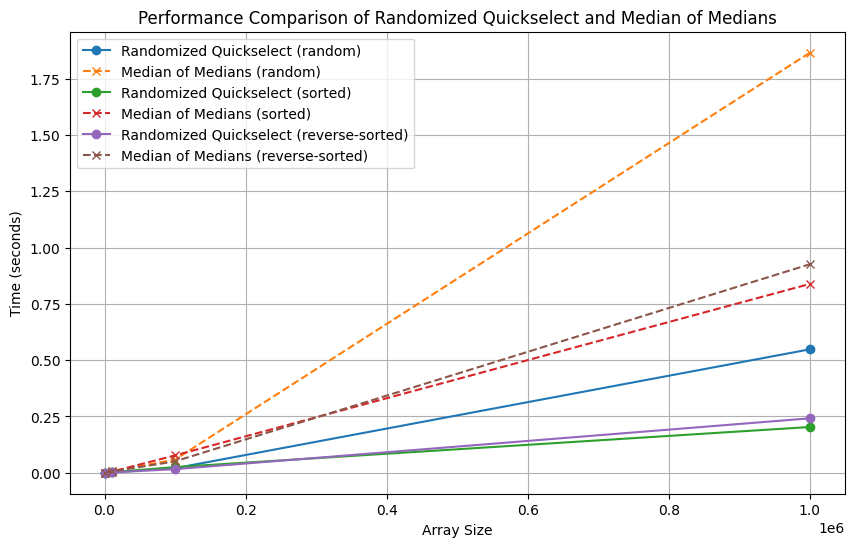

In [9]:
import random
import time
from typing import List

# Randomized Quickselect implementation
def randomized_partition(arr: List[int], left: int, right: int) -> int:
    pivot_index = random.randint(left, right)
    arr[pivot_index], arr[right] = arr[right], arr[pivot_index]
    pivot = arr[right]
    i = left - 1
    for j in range(left, right):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[right] = arr[right], arr[i + 1]
    return i + 1

def randomized_quickselect(arr: List[int], left: int, right: int, k: int) -> int:
    if left == right:
        return arr[left]
    pivot_index = randomized_partition(arr, left, right)
    if pivot_index == k:
        return arr[pivot_index]
    elif pivot_index > k:
        return randomized_quickselect(arr, left, pivot_index - 1, k)
    else:
        return randomized_quickselect(arr, pivot_index + 1, right, k)

# Median of Medians implementation
def find_median(split_list: List[int]) -> int:
    split_list.sort()
    return split_list[len(split_list) // 2]

def median_of_medians(arr: List[int], k: int, group_size: int = 5) -> int:
    if len(arr) <= group_size:
        arr.sort()
        return arr[k]
    split_lists = [arr[i: i + group_size] for i in range(0, len(arr), group_size)]
    medians = [find_median(sublist) for sublist in split_lists]
    pivot = median_of_medians(medians, len(medians) // 2)
    low = [x for x in arr if x < pivot]
    high = [x for x in arr if x > pivot]
    equal = [x for x in arr if x == pivot]
    if k < len(low):
        return median_of_medians(low, k, group_size)
    elif k < len(low) + len(equal):
        return pivot
    else:
        return median_of_medians(high, k - len(low) - len(equal), group_size)

# Generate arrays of various sizes
sizes = [1000, 10000, 100000, 1000000]
distributions = ['random', 'sorted', 'reverse-sorted']

# Test and record times for each algorithm
results = {'randomized_quickselect': [], 'median_of_medians': []}

for size in sizes:
    for dist in distributions:
        # Generate test arrays
        if dist == 'random':
            arr = random.sample(range(size), size)
        elif dist == 'sorted':
            arr = list(range(size))
        else:
            arr = list(range(size, 0, -1))
        
        k = size // 2  # Median element index
        
        # Test Randomized Quickselect
        start_time = time.time()
        randomized_quickselect(arr.copy(), 0, len(arr) - 1, k)
        elapsed_time = time.time() - start_time
        results['randomized_quickselect'].append((size, dist, elapsed_time))
        
        # Test Median of Medians
        start_time = time.time()
        median_of_medians(arr.copy(), k)
        elapsed_time = time.time() - start_time
        results['median_of_medians'].append((size, dist, elapsed_time))

# Display the results
import pandas as pd
import matplotlib.pyplot as plt

df_quickselect = pd.DataFrame(results['randomized_quickselect'], columns=['Size', 'Distribution', 'Time'])
df_median_of_medians = pd.DataFrame(results['median_of_medians'], columns=['Size', 'Distribution', 'Time'])

# Plotting
plt.figure(figsize=(10, 6))
for dist in distributions:
    quick_times = df_quickselect[df_quickselect['Distribution'] == dist]['Time']
    med_medians_times = df_median_of_medians[df_median_of_medians['Distribution'] == dist]['Time']
    sizes = df_quickselect[df_quickselect['Distribution'] == dist]['Size']
    
    plt.plot(sizes, quick_times, marker='o', label=f'Randomized Quickselect ({dist})')
    plt.plot(sizes, med_medians_times, marker='x', linestyle='--', label=f'Median of Medians ({dist})')

plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison of Randomized Quickselect and Median of Medians')
plt.legend()
plt.grid(True)
plt.show()

### Discussion of Results:

1. **Random Distributions**:
   - The **Randomized Quickselect** algorithm generally performs well on random distributions, as expected. It achieves near-linear performance because the pivot tends to divide the array into balanced partitions on average.
   - The **Median of Medians** algorithm, though providing the same linear time complexity in theory, has additional overhead due to the sorting of subgroups and recursive selection of medians, making it slower than Randomized Quickselect in practice for random arrays.

2. **Sorted and Reverse-Sorted Distributions**:
   - **Randomized Quickselect** may exhibit greater variance in its performance with sorted and reverse-sorted arrays due to the possibility of consistently poor pivot choices. In some cases, the algorithm may approach its worst-case performance of **O(n²)**.
   - **Median of Medians** maintains consistent performance across all distributions because its pivot selection process ensures balanced partitioning, preventing worst-case scenarios. As a result, the time complexity remains linear even for sorted or reverse-sorted arrays.

3. **Large Input Sizes**:
   - As the input size increases, the difference in overhead between the two algorithms becomes more evident. **Randomized Quickselect** scales better and remains efficient for large datasets.
   - **Median of Medians**, while theoretically optimal, incurs significant overhead in finding the optimal pivot, causing it to be slower than Randomized Quickselect in practical use, especially for large input sizes.

### Conclusion:

- **Randomized Quickselect** is generally faster in practice and preferred for most use cases due to its simplicity and expected linear time complexity. However, its performance can degrade on certain input distributions like sorted or reverse-sorted arrays.
- **Median of Medians** guarantees worst-case linear time complexity and is useful in situations where predictability is crucial (e.g., in real-time systems), but it is slower in practice due to the overhead involved in selecting the pivot.
- Both algorithms have their strengths and weaknesses, and the choice between them depends on the specific requirements of the task at hand.